In [1]:
# import 'Pandas' 
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.shape

(12330, 18)

In [4]:
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [5]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

##### Print/ Plot the Variables

For Categorical variables

In [6]:
cat_data=df.select_dtypes(exclude=np.number)


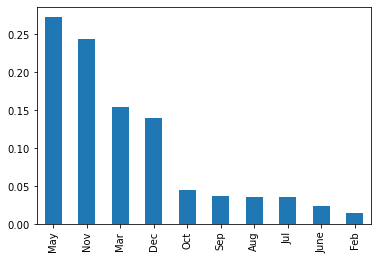

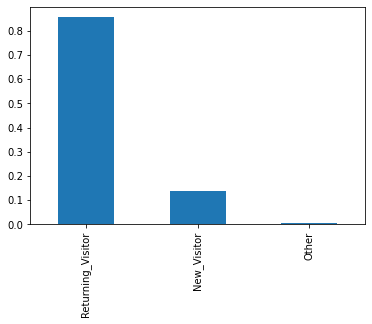

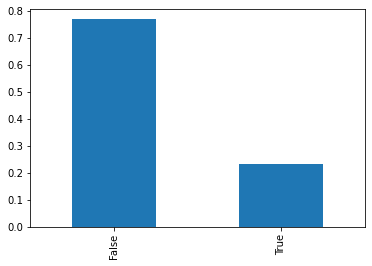

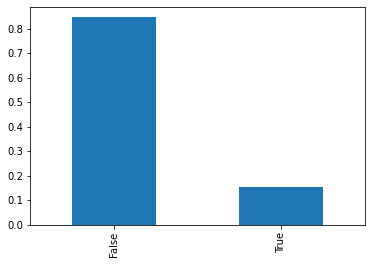

In [7]:
for i in cat_data.columns:
    cat_data[i].value_counts(normalize=True).plot(kind='bar')
    plt.show()

<AxesSubplot:>

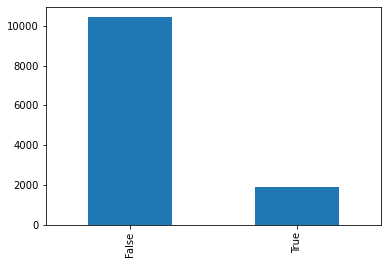

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(df["Revenue"]).plot(kind="bar")

In [9]:
# to visualize the numeric data
num_data=df.select_dtypes(include=np.number)
#sb.pairplot(num_data)


In [10]:
plt.figure(figsize=(12,8))
sb.heatmap(num_data.corr(),annot=True)

NameError: name 'sb' is not defined

<Figure size 864x576 with 0 Axes>

In [11]:
# understand the distrubution of each numeric data for each level in Revenue

for i in num_data.columns:
    sb.boxplot(df['Revenue'],df[i])
    plt.show()

NameError: name 'sb' is not defined

##### Check for any missing values in the data 

In [12]:
df.isnull().sum().sum()

0

##### Encode and Scale the data 

Revenue is the target column in this dataset. We are not using the revenue column to build the cluster model. 

for month we can use ordinal encoding and we can use one hot encoding for visiter type and weekend

In [13]:
data = df.drop(['Revenue'], axis=1)

In [14]:
data['Weekend']=data['Weekend'].astype('object')

In [15]:
data['Month']=data['Month'].replace({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,
                                     'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,
                                     'Nov':11,'Dec':12})

In [16]:
data=pd.get_dummies(data)

In [17]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,1,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,0,1,0,1


In [18]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
data_sc = pd.DataFrame(sc.fit_transform(data),columns=data.columns) 
data_sc.head() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,-1.233426,-0.790293,-0.894178,-0.762629,-0.399087,-0.083316,0.410621,0.550552,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.665924,-0.136078,-0.207952,-0.894178,-0.514182,-0.399087,-0.083316,0.410621,0.550552,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.665924,2.058618,-0.790293,2.437081,-0.265735,-0.399087,-0.083316,0.410621,0.550552,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.665924,0.961270,-0.207952,-0.477771,-0.017289,-0.399087,-0.083316,0.410621,0.550552,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.665924,0.961270,0.374389,-0.894178,-0.017289,-0.399087,-0.083316,0.410621,-1.816360,1.816360


##### K - Means Clustering

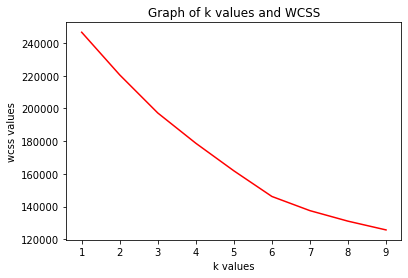

In [19]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_sc)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

######  Here, if we consider the problem statement, focus on "Revenue" attrubute as class variable, we should create the 2 clusters for this dataset and should compare the results. But Elbow graph shows we can get 6 clusters in this dataset. So, we will try the solution with both the ways.

Considering 6 clusters

Using optimal value of K - Cluster the data. 


In [20]:
kmeans = KMeans(n_clusters=5, n_init = 15, random_state=10)

# Model with k=6:
kmeans6 = KMeans(n_clusters=6)

# Training the model:
m1=kmeans6.fit(data_sc)
clusters = m1.predict(data_sc)

In [21]:
kmean_out=data.copy()
kmean_out['Label']=m1.labels_

We can see the cluster centeres to understand the cluster charecteristics

In [22]:
kmean_out.iloc[:,1:].groupby('Label').mean()

,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
Label,,,,,,,,,,,,,,,,,,,
0,62.695588,0.176471,11.685490,12.470588,570.404862,0.038551,0.063349,18.191812,0.000000,11.670588,5.823529,8.894118,6.882353,13.682353,0.000000,1.0,0.000000,0.917647,0.082353
1,64.408294,0.409223,20.355088,29.583981,1074.364568,0.011061,0.033226,5.685428,0.065146,7.598058,2.116990,2.244660,3.119903,4.068932,0.000000,0.0,1.000000,0.000000,1.000000
2,51.961545,0.246111,9.846830,26.000154,963.005342,0.011395,0.036155,4.662408,0.070692,7.341291,2.106730,2.360234,3.145079,3.949484,0.000000,0.0,1.000000,1.000000,0.000000
3,90.220649,0.310990,16.761974,18.063406,630.886032,0.001988,0.017713,10.960682,0.019928,8.426932,2.022343,2.300725,3.272343,3.841184,1.000000,0.0,0.000000,0.714976,0.285024
4,331.451760,2.885612,259.541221,114.483467,4582.160292,0.006492,0.019833,9.769760,0.030206,8.856122,2.096515,2.218052,2.813226,3.566577,0.008937,0.0,0.991063,0.827525,0.172475
5,0.869175,0.009815,0.000000,2.624864,48.601032,0.177772,0.186454,0.000000,0.106216,6.731734,2.136314,2.252999,3.061069,5.056707,0.030534,0.0,0.969466,0.851690,0.148310


There is significant differnce in the cluster centroids amonng the cluster groups. 

For example, we can infer like, the average Administraitve duration of cluster group is 331, which is high compare to all other groups. The average administrative duration for cluster group 2 is as low as 0.869

Like this we can make inferences about each group with respect to eacg feature. 

In [23]:
print('Predicted Data Classes:')
print(kmean_out['Label'].value_counts())

Predicted Data Classes:
2    6493
1    2060
3    1656
4    1119
5     917
0      85
Name: Label, dtype: int64


In [24]:
kmean_out.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Label
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,...,1,1,1,1,0,0,1,1,0,5
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,...,2,2,1,2,0,0,1,1,0,2


In [25]:
#compare the cluster group with the revenue
pd.crosstab(kmean_out['Label'],df['Revenue'])

Revenue,False,True
Label,,
0,69,16
1,1729,331
2,5698,795
3,1236,420
4,776,343
5,914,3


##### Perform some EDA to understand the charecteristics of each cluster

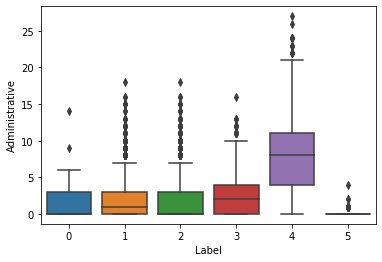

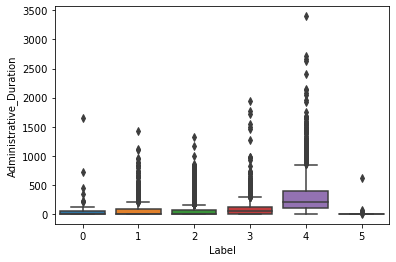

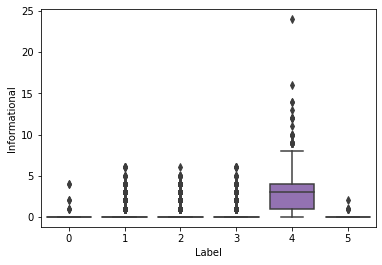

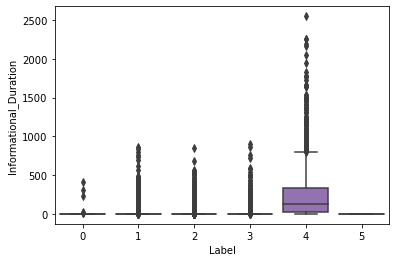

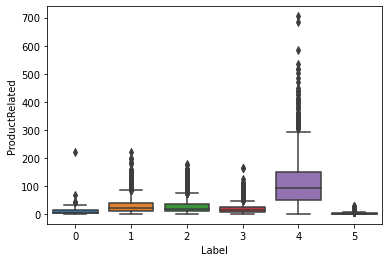

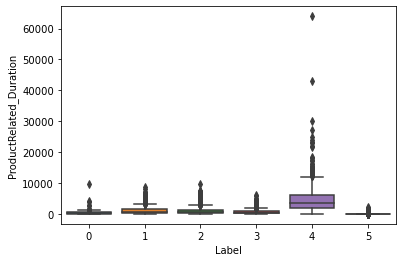

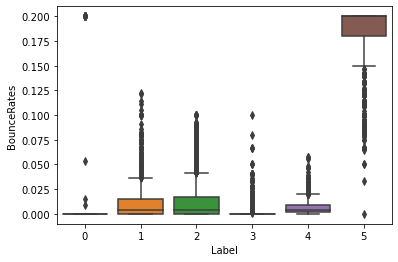

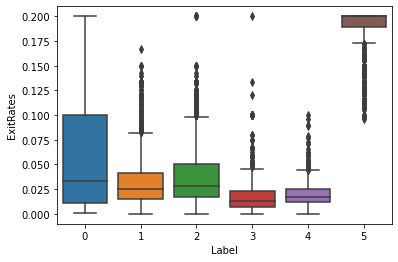

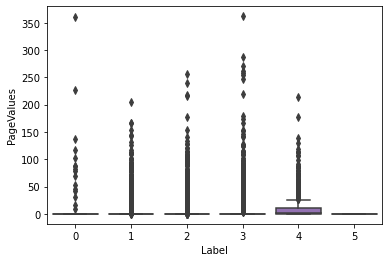

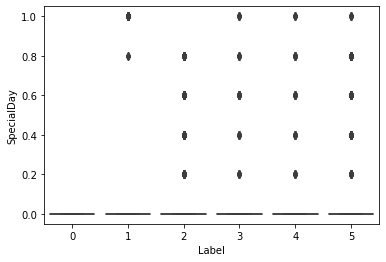

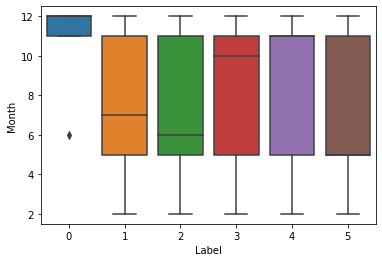

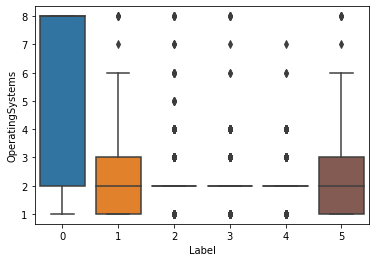

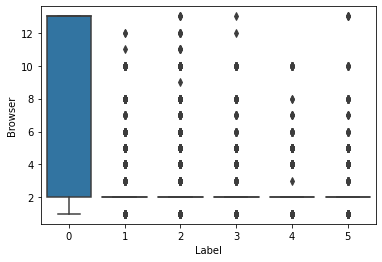

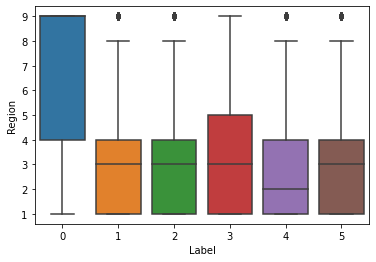

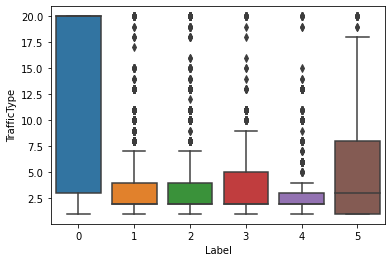

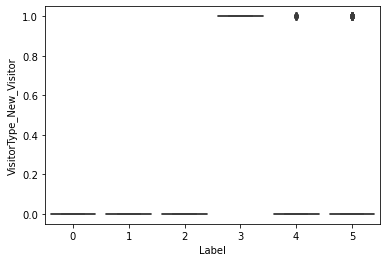

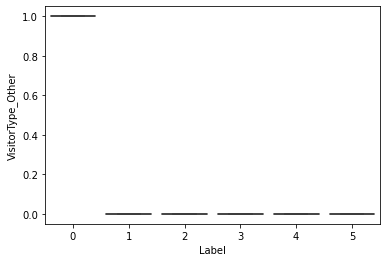

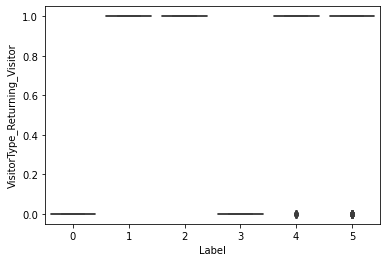

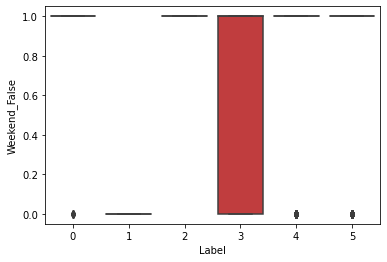

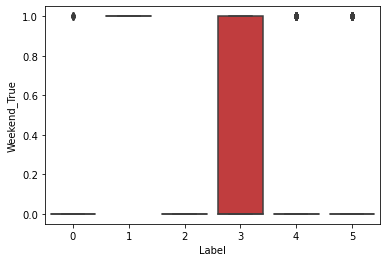

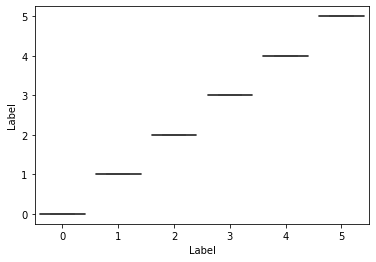

In [39]:

for i in kmean_out.columns:
    sns.boxplot(kmean_out['Label'],kmean_out[i])
    plt.show()

The same above cluster formations can also do with k=2, as only two levels are exist in 'REevenue' columns

##### compute Silhoutee score

In [36]:
from sklearn.metrics import silhouette_score
sil=[]
cl=[2,3,4,5,6,7,8]
for k in cl:
    mod=KMeans(k)
    mod.fit(data_sc)
    score=silhouette_score(data_sc,mod.labels_)
    print(score)
    sil.append(score)

0.2460656530009424
0.2443983160274871
0.24750437867421943
0.2168287327951335
0.2312759271134836
0.2337508369884079
0.21979708286881391


Silhoutee score is high for k=2, but otehr values are not really low compare to k=2

##### Using Hierarichal Clustering

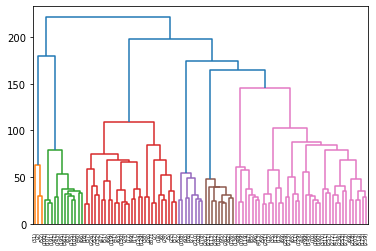

In [37]:
from scipy.cluster.hierarchy import linkage , dendrogram, fcluster,cophenet
mergings = linkage(data_sc, method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp',p=100)
plt.show()

In [38]:
for i in [50,60,70,80,90,100,105,110,120,130,140,145,146,150,160,165,170,180,190,200]:
    clusters = fcluster(mergings, i, criterion='distance')
    print('The number of cluster for the distance of', i,' is ', len(np.unique(clusters)))

The number of cluster for the distance of 50  is  28
The number of cluster for the distance of 60  is  21
The number of cluster for the distance of 70  is  15
The number of cluster for the distance of 80  is  12
The number of cluster for the distance of 90  is  9
The number of cluster for the distance of 100  is  9
The number of cluster for the distance of 105  is  8
The number of cluster for the distance of 110  is  7
The number of cluster for the distance of 120  is  7
The number of cluster for the distance of 130  is  7
The number of cluster for the distance of 140  is  7
The number of cluster for the distance of 145  is  7
The number of cluster for the distance of 146  is  6
The number of cluster for the distance of 150  is  6
The number of cluster for the distance of 160  is  6
The number of cluster for the distance of 165  is  6
The number of cluster for the distance of 170  is  5
The number of cluster for the distance of 180  is  3
The number of cluster for the distance of 190  

For about 35 units of distance, cluster reamin same as 7 and for about 25 units of distance cluster reamin same as 6. These could be better choice of number of clusters for this dataset

##### Apply PCA

In [27]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = data_sc.shape[1])
pca_data = pca.fit_transform(data_sc)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.90:
        break
    itr=itr+1

print('The number of principle components capturing 90 percent varaition is data is : ',itr,' Varaince explained is ', cum_var)

The number of principle components capturing 90 percent varaition is data is :  13  Varaince explained is  0.9201181019529637


Text(0, 0.5, 'Variance Ratio')

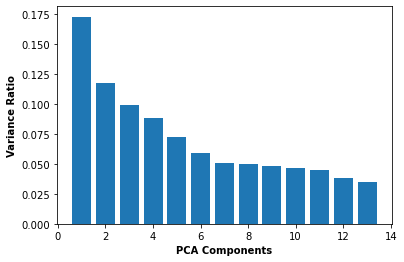

In [28]:
# Variance Ratio bar plot for each PCA components.
pc=exp_var_ratio[:itr]
ax = plt.bar(range(1,len(pc)+1), pc)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

In [29]:
#Select only 13 PCs
pcadata=pca_data[:,:itr]
pcadata.shape

(12330, 13)

In [30]:
pd.DataFrame(pcadata).corr().round()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
1,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
2,-0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
3,-0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
4,-0.0,-0.0,-0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
5,-0.0,0.0,-0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0
7,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0
8,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0
9,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,1.0,0.0,0.0,0.0


Text(0, 0.5, 'Cumulative Explained Variance')

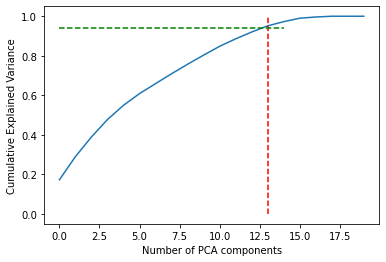

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=13, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.94, xmax=14, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

In [32]:
# Checking which attributes are well explained by the pca components
attributes_pca=pd.DataFrame()
for i in range(4):
    attributes_pca['PC'+str(i+1)]=pca.components_[i]
attributes_pca['Attribute']=data_sc.columns
attributes_pca

,PC1,PC2,PC3,PC4,Attribute
0,0.376538,0.006948,0.043197,0.018701,Administrative
1,0.322214,0.022465,0.044469,0.035257,Administrative_Duration
2,0.341058,0.129452,-0.014406,0.070473,Informational
3,0.289172,0.129493,-0.011676,0.077751,Informational_Duration
4,0.405900,0.160863,0.018287,0.062187,ProductRelated
5,0.406476,0.171201,0.024791,0.074790,ProductRelated_Duration
6,-0.278954,0.266675,-0.052177,0.183122,BounceRates
7,-0.325598,0.280190,-0.054852,0.169623,ExitRates
8,0.094245,-0.151370,0.071058,0.033261,PageValues
9,-0.082894,0.124663,-0.042581,-0.005285,SpecialDay


In [33]:
col=list(np.arange(1,pcadata.shape[1]+1))
col

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [34]:
# Creating new dataframe with Principal components

df_pca_final = pd.DataFrame(pcadata, columns=col)
#df_pca_final = pd.concat([data['country'], df_pca], axis=1)
df_pca_final.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.391900,2.619345,-0.430362,-0.710271,3.113079,-0.043368,-0.247745,0.485193,0.443054,0.705827,1.124301,-0.014177,0.942996
1,-1.592834,0.862006,0.172902,-0.977367,-0.249117,0.593962,0.370594,-0.165087,0.500126,-0.415146,0.836334,-0.256508,0.948772
2,-3.541163,2.234424,0.303004,1.642396,2.438477,0.291070,0.496817,1.496591,-1.465495,1.217901,-0.082794,-2.312657,1.456425
3,-2.214072,1.276816,0.295556,0.117862,0.500955,0.590929,0.154090,0.084381,0.445379,-0.303989,0.578482,-0.900204,1.232168
4,-0.963675,-0.226298,-2.544666,0.841272,-0.827452,0.767976,0.052306,-0.306508,0.604539,-0.562653,0.955028,-0.424694,1.286277


226901.1239416007
200848.9388861659
177656.57531016148
159151.98266779922
142283.28042371455
129450.10697323571
120805.99844242097
115981.48784015977
109880.1684152563
104728.18438754708
100734.13512393663
96920.42055011215


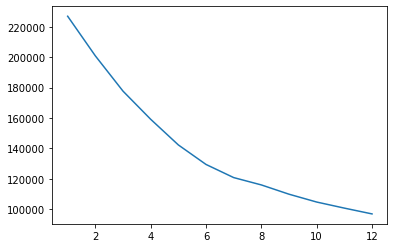

In [35]:
# K-means Clustering
wcss=[]
cl=[1,2,3,4,5,6,7,8,9,10,11,12]
for k in cl:
    mod=KMeans(k)
    mod.fit(pcadata)
    print(mod.inertia_)
    wcss.append(mod.inertia_)
plt.plot(cl,wcss)

PCA data also giving the elbow point same around 5 to 7 as before with only 13 principle components